# Exercise - Linear Regression
# DATA 3300

## Name: Chance Wiese

### Q1

**Begin by loading the required libraries and packages - including `pandas`, `numpy`, `matplotlib.pyplot`, `statsmodels.api`, `sklearn.model_selection`, and `sklearn.linear_model`. Then import the dataset as a pandas dataframe and remove any leading or trailing spaces from the columns.**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metric

In [5]:
df = pd.read_csv("/content/carsalesS19.csv")
df = df.rename(columns=lambda x: x.strip())       # let's remove any leading/trailing whitespace from column names too
# pull up a heading
df.head()

,SPID,Age,Gender,Ex,Su,Brand,HSGrad,CollegeGrad,Married,IQ,WritExam,Months
0,1,54,female,3.0,4.5,Honda,Y,N,Y,95,0.727,24
1,2,35,male,7.0,5.5,Subaru,Y,Y,Y,99,0.809,16
2,3,40,male,3.6,3.5,Honda,Y,N,Y,112,0.945,9
3,4,34,female,6.2,1.5,Honda,Y,N,N,109,0.844,11
4,5,40,male,6.4,1.5,Subaru,N,N,N,86,0.703,24


**Now let's create a new dataframe object that contains only the numerical variables so we can FIRST run a CORRELATION analysis. Let's call the new object df_cor.**

**Generate a CORRELATION MATRIX to evaluate the relationships amongst the IVs and the IVs with the DV. Be sure to only include those variables that should be included for Pearson correlation analysis (e.g., should categorical variables be included or excluded?).**

In [6]:
df_cor = df.drop(["SPID", "Gender", "Brand", "HSGrad", "CollegeGrad", "Married"], axis=1)
df_cor.head()

,Age,Ex,Su,IQ,WritExam,Months
0,54,3.0,4.5,95,0.727,24
1,35,7.0,5.5,99,0.809,16
2,40,3.6,3.5,112,0.945,9
3,34,6.2,1.5,109,0.844,11
4,40,6.4,1.5,86,0.703,24


In [7]:
# create correlation matrix
cor_matrix = df_cor.corr()
cor_matrix.style.background_gradient(cmap='seismic', axis=None, vmin=-1, vmax=1)

,Age,Ex,Su,IQ,WritExam,Months
Age,1.000000,0.087810,-0.019577,0.037683,0.083308,0.100242
Ex,0.087810,1.000000,0.017798,0.098405,0.063983,0.555805
Su,-0.019577,0.017798,1.000000,0.075746,0.081838,0.057962
IQ,0.037683,0.098405,0.075746,1.000000,0.823414,-0.300422
WritExam,0.083308,0.063983,0.081838,0.823414,1.000000,-0.246135
Months,0.100242,0.555805,0.057962,-0.300422,-0.246135,1.000000


>### 1A
**Because the dealership is interested in predicting Months (how long an employee will stay in a position), consider Months to be the DV.**

**Based on the correlation matrix, given a minimum correlation coefficient ($r$) value of 0.5 to determine collinearity, are there any collinear *independent variables*? If so, report the variable pair and their correlation coefficient.**

Written Exam and IQ are collinear because they have a r = 0.83, which passes our threshold

>### 1B
**Based on the correlation matrix, which two independent variables appear to have the strongest relationship to the dependent variable? For each, report the variable, the correlation coefficient, and the $R^2$ value.**

* EX - Months, r = 0.555805 | r^2 = 0.30
* IQ - Months, r = -0.300422 | r^2 = 0.09

>### 1C
**Within this correlation context, what does the $R^2$ value tell us?**

The R^2 is variance explained, 30% of the variance or change in how long a salesperson stays can be explained by their extraversion score

>### 1D
**For the collinear relationship reported in 1A, provide a hypothesis that could explain how the one variable value may be causing the other.
How should we address this issue?**

Written Exam and IQ are likely collinear because they are both measuring some form of intelligence

## Q2
**Run a LINEAR REGRESSION ANALYSIS to create a model predicting the number of months a newly hired sales associate at an Innergystic dealership will remain on the job. If you have two variables that appear to be collinear, only include one or the other (retaining the more broadly applicable of the two variables).**

**Split the data into a training and a test set, use the training set to fit the model, and then evaluate its performance on the test set.**

In [8]:
df.columns

Index(['SPID', 'Age', 'Gender', 'Ex', 'Su', 'Brand', 'HSGrad', 'CollegeGrad',
       'Married', 'IQ', 'WritExam', 'Months'],
      dtype='object')

In [9]:
x = df.drop(['SPID','WritExam', 'Months'], axis=1) # select the IVs
x = pd.get_dummies(data = x, drop_first = True)      # input parameters for creating dummy variables
x.head()

,Age,Ex,Su,IQ,Gender_male,Brand_Honda,Brand_Subaru,HSGrad_Y,CollegeGrad_Y,Married_Y
0,54,3.0,4.5,95,0,1,0,1,0,1
1,35,7.0,5.5,99,1,0,1,1,1,1
2,40,3.6,3.5,112,1,1,0,1,0,1
3,34,6.2,1.5,109,0,1,0,1,0,0
4,40,6.4,1.5,86,1,0,1,0,0,0


In [10]:
y = df['Months'] # set DV

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 101) # set a test and training split parameters

print(x_train.shape)                                               # print the shape of x_train, what does this show us?
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(238, 10)
(60, 10)
(238,)
(60,)


>### 2A
**Generate a table of the summary statistics of your regression model**

In [12]:
x_train_Sm = sm.add_constant(x_train)
ls = sm.OLS(y_train, x_train_Sm).fit()                             # input your x and y training sets to train the ols model
# produce the summary statistics table
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:                 Months   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     91.06
Date:                Tue, 05 Mar 2024   Prob (F-statistic):           1.12e-73
Time:                        20:43:51   Log-Likelihood:                -625.95
No. Observations:                 238   AIC:                             1274.
Df Residuals:                     227   BIC:                             1312.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            29.4153      3.421      8.599

>### 2B
**Which if any IV are not significant at the $\alpha = 0.05$ level? How do you know this?**

Age and Gender_male are not statistically significant, we know this because they have p values greater than 0.05

>### 2C
**What is the value of the intercept coffiecient? What does this value tell us?**

Th eintercept is the average value of y when all Xs are set to 0, so in this case we'd expect a 0 year old, female, etc. to stay 29 months

## Q3
**Based on your answer from 2B, formulate and apply the model developed above by responding to each of the following:**

>### 3A
**Remove the IV with the highest p-value, rerun the model, then generate the summary statistics table. Repeat as necessary until all non-significant IVs have been removed. With each iteration, state which IV has been removed.**

In [13]:
x_train_Sm = x_train_Sm.drop(['Gender_male'], axis=1)                              # drop the IV with the highest p-value
ls=sm.OLS(y_train,x_train_Sm).fit()                                     # retrain the model
# print the summary table
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:                 Months   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     101.5
Date:                Tue, 05 Mar 2024   Prob (F-statistic):           1.22e-74
Time:                        20:43:51   Log-Likelihood:                -626.08
No. Observations:                 238   AIC:                             1272.
Df Residuals:                     228   BIC:                             1307.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            29.7028      3.367      8.823

In [14]:
x_train_Sm = x_train_Sm.drop(['Age'], axis=1)                              # drop the next non-significant IV
ls=sm.OLS(y_train,x_train_Sm).fit()                                     # retrain the model
print(ls.summary())                                                     # produce the summary statistics

                            OLS Regression Results                            
Dep. Variable:                 Months   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     113.6
Date:                Tue, 05 Mar 2024   Prob (F-statistic):           2.53e-75
Time:                        20:43:51   Log-Likelihood:                -626.95
No. Observations:                 238   AIC:                             1272.
Df Residuals:                     229   BIC:                             1303.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            31.1721      3.173      9.823

> ### 3B
**Once you've run a regression in which all IVs are significant ($\alpha = 0.05$), write out the full model in equation form.**

$Months = 31.1721 + 2.6784*Ex + 0.4316*Su - 0.3987*IQ + 5.4733*Brand_Honda + 5.3883*Brand_Subaru + 6.2509*HSGrad_Y - 7.2494*CollegeGrad_Y - 0.9823*Married_Y$

>### 3C
**Let's say that a Suburu dealership owned by the company is considering hiring a certain job applicant into a sales position. Using the formula above, how long would you expect the applicant to stay in the position if they were a single, 20 year-old female high school grad with no college experience, a 100 IQ and WritExam score of 80%, an Extraverison score of 5, and an SuMind Score of 1?   Show your math.**

In [15]:
months = 31.1721 + (2.6784*5) + (0.4316*1) - (0.3987*100) + (5.5672*0) + (5.4733*1) + (6.2509*1) - (7.2494*0) - (0.9823*0)
print("predicted_months =", months)

predicted_months = 16.8499


>### 3D
**Does HSGrad_Y have a postive or negative relationship with Months? What about CollegeGrad_Y? What does it mean in relation to the reference groups (HSGrad_N and CollegeGrad_N)?**

HSGrad_Y has a positive relationship with months, meaning HS grads stay longer than non-HS grads on average. Specifically about 6 months longer.

CollegeGrad_Y has a negative relationship with months, meaning college grads stay less time that non-college grads on average. About 7 months shorter.

## Q4

**Now let's evaluate the model performance on your test set to examine how well our model might generalize to new data:**

>### 4A
**Using the LinearRegression method in Scikit learn, fit the final model to the training data and then apply the model to the test data.**

In [20]:
model = LinearRegression()
model.fit(x_train_Sm, y_train)                                       # train the regression model on training data using the scikit learn version of regression

x_test = x_test.drop(['Age', 'Gender_male'], axis=1)                # drop the two non-significant IVs from the test set
x_test_Sm = sm.add_constant(x_test)              # add a constant (intercept) value to the test set

In [23]:
# make predictions onto the test set
predictions = model.predict(x_test_Sm)


>### 4B
**Using the metric method, produce the mean squared error and $R^2$ for the model, how does this $R^2$ compare to the value generated on the training data? What does this indicate?**

In [24]:
print("Mean squared error =", round(metric.mean_squared_error(y_test, predictions), 2))    # produce the MSE for observed vs predicted
print("R2 score =", round(metric.r2_score(y_test, predictions), 2))                        # produce the R^2 for observed vs predicted

Mean squared error = 8.66
R2 score = 0.85


In [25]:
print("RMSE = ", np.sqrt(8.66))

RMSE =  2.9427877939124323


We have an R-squared that is on par (if not a bit higher) for our test data, as compared to our training data, indicating that our model should generalize well when applied to new data

>### 4C
**Produce a visualization of the relationship between the observed (actual) values of months in the test set and the predicted values of months**

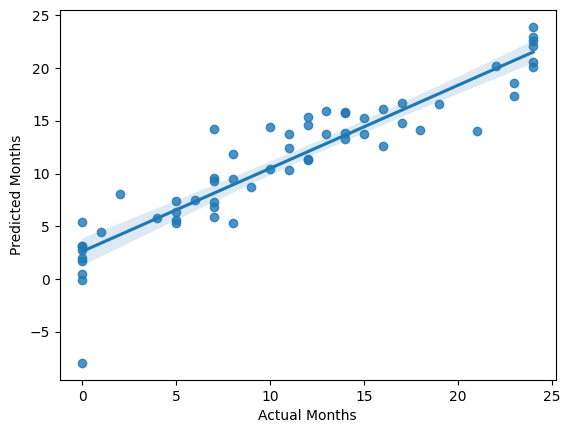

In [26]:
import seaborn as sns
sns.regplot(x = y_test, y = predictions)                                     # insert what to plot on the x and y access
plt.ylabel("Predicted Months")
plt.xlabel("Actual Months")
plt.show()